<a id='top'></a>

# Train Data Exploratory Data Analysis Exercise using [pandas](http://pandas.pydata.org/)
Last updated: 19/01/2020

![title](images/traintimetable.jpg)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section where the questions are the brief are asked, skipping the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

## Introduction
This notebook is a short Exploratory Data Analysis (EDA) of train data using [pandas](http://pandas.pydata.org/) DataFrames and [Seaborn](https://seaborn.pydata.org/) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [EddWebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).


The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/train) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/train/blob/master/Train%20Data%20Exploratory%20Data%20Analysis%20Exercise%20using%20pandas%20-%2019012020.ipynb).

## Notebook Contents
1.    [Notebook Dependencies](#section1)<br>
2.    [Project brief](#section2)<br>
      2.1.  [Background Information](#section2.1)<br>
      2.2.  [Exercise](#section2.2)<br>
      2.3.  [Journey Example](#section2.3)<br>
3.    [Data Sources](#section2)<br>
      3.1.  [Introduction](#section3.1)<br>
      3.2.  [Data Dictionary](#section3.2)<br>
      3.3.  [Creating the DataFrame](#section3.3)<br>
      3.4.  [Initial Data Handling](#section3.3)<br>
      3.5.  [Export the Raw DataFrame](#section3.5)<br>
4.    [Data Engineering](#section4)<br>
      4.1.  [Introduction](#section4.1)<br>
      4.2.  [String Cleaning](#section4.2)<br>
      4.3.  [Converting Data Types](#section4.3)<br>
      4.4.  [Export the Engineered DataFrame](#section4.4)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      5.1.  [Identify a table showing how many of each journey are run per day](#section5.1)<br>
      5.2.  [Subset the table such that it contains the 16 most common journeys per date](#section5.2)<br>
      5.3.  [Identify the day that the timetable was changed *via* a suitably convincing visualisation](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Bibliography](#section7)

<a id='section1'></a>

## 1. Notebook Dependencies

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [Jupyter notebooks](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for data visualisation,
*    [glob](https://docs.python.org/3/library/glob.html) for reading multiple CSVs to create one single DataFrame, and
*    [os](https://docs.python.org/3/library/os.html) module, which provides a portable way of using operating system dependent functionality.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

In [1]:
# Import modules

# Python ≥3.5 (ideally)
import sys
assert sys.version_info >= (3, 5)

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np

# Data Preprocessing
import pandas as pd
import os    #  used to read the csv filenames
import re
import random

# Reading Multiple CSV
import glob    #  used to read multiple csvs to create one single DataFrame

# Plotting figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # not include with Conda, 'pip install missingno' in the terminal if you don't have it

# Display in Jupyter
from IPython.core.display import HTML
from IPython.display import Image

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


<a id='section2'></a>

## 2. Project Brief
The following brief has been copied and pasted from the provided HTML document and can be accessed [here](./README.html). I have included this brief in this Jupyter notebook for reference. Click [here](#section3) to skip to the next section where the proper coding begins. 

<a id='section2.1'></a>

### 2.1. Background Information
>In this investigation we aim to explore some train movement data to infer some features of the dataset. Our ultimate goal will be to find the date at which the timetable changed the public routes that it commonly ran.
>*    The data has been provided to us in `csv` format. This data contains
>     +    The schedule of the network
>     +    The actual time a train arrived at a station
>*    Note that if a train has missed its scheduled run, the actual times will all appear as `NA`.

<a id='section2.2'></a>

### 2.2. Exercise
>*    Load the data
>*    Add a date column to the data set
>     +    The best way to do this will be by preserving the file name
>     +    In this case, an acceptable, though slightly less desirably solution is to extract the date from an appropriate timestamp
>*    Identify a table showing how many of each journey are run per day
>     +    See below for an example of a journey
>     +    Ideally the table would have column headings `date`, `origin_station`, `destination_station` and `count`
>*    Subset the table such that it contains the 16 most common journeys per date
>     +    There is some context here which is worth some thought, but it will be ignored for now
>*    Identify the day that the timetable was changed *via* a suitably convincing visualisation

<a id='section2.3'></a>

### 2.3. Journey Example
>The following 19 stops make up one journey.
>*   Sugar Wave, the first station is the origin stop
>*   Attempt Pin, the last station is the destination stop
>*   The journey is defined by the origin and destination stops, and not by the complete set of stations between the endpoints
>     +    In practice, a journey would be defined by the complete set of journeys between the endpoints
>     +    For this exercise, however, the definition is simplified

In [2]:
# Initialize list of lists, data_ex 
data_ex = [[1, 'Sugar Wave', 'Attempt Pin', 'Sugar Wave', '01/08/15 05:09:00', '01/08/15 05:09:00', np.NaN],
        [2, 'Sugar Wave', 'Attempt Pin', 'Sky Weight', '01/08/15 05:09:00', '01/08/15 05:11:00', '01/08/15 05:10:30'],
        [3, 'Sugar Wave', 'Attempt Pin', 'Join Kick', '01/08/15 05:09:00', '01/08/15 05:13:00', '01/08/15 05:12:30'],
        [4, 'Sugar Wave', 'Attempt Pin', 'Pickle Wind', '01/08/15 05:09:00', '01/08/15 05:15:00', '01/08/15 05:14:30'],
        [5, 'Sugar Wave', 'Attempt Pin', 'Pear Push', '01/08/15 05:09:00', '01/08/15 05:18:00', '01/08/15 05:17:30'],
        [6, 'Sugar Wave', 'Attempt Pin', 'Maid Society', '01/08/15 05:09:00', '01/08/15 05:21:00', '01/08/15 05:20:30'],
        [7, 'Sugar Wave', 'Attempt Pin', 'Glove Attraction', '01/08/15 05:09:00', '01/08/15 05:23:00', '01/08/15 05:22:30'],
        [8, 'Sugar Wave', 'Attempt Pin', 'Division Sock', '01/08/15 05:09:00', '01/08/15 05:25:00', '01/08/15 05:24:30'],
        [9, 'Sugar Wave', 'Attempt Pin', 'Stone Wave', '01/08/15 05:09:00', '01/08/15 05:27:00', '01/08/15 05:26:30'],
        [10, 'Sugar Wave', 'Attempt Pin', 'Cart Trees Turnback', '01/08/15 05:09:00', '01/08/15 05:30:00', '01/08/15 05:29:30'],
        [11, 'Sugar Wave', 'Attempt Pin', 'Cat Cheese', '01/08/15 05:09:00', '01/08/15 05:30:00', '01/08/15 05:30:30'],
        [12, 'Sugar Wave', 'Attempt Pin', 'Digestion Lake', '01/08/15 05:09:00', '01/08/15 05:32:00', '01/08/15 05:31:30'],
        [13, 'Sugar Wave', 'Attempt Pin', 'Bushes Bag', '01/08/15 05:09:00', '01/08/15 05:34:00', '01/08/15 05:33:30'],
        [14, 'Sugar Wave', 'Attempt Pin', 'Cracker Knowledge', '01/08/15 05:09:00', '01/08/15 05:36:00', '01/08/15 05:35:30'],
        [15, 'Sugar Wave', 'Attempt Pin', 'Bat Event', '01/08/15 05:09:00', '01/08/15 05:38:00', '01/08/15 05:37:30'],
        [16, 'Sugar Wave', 'Attempt Pin', 'Arm Hate', '01/08/15 05:09:00', '01/08/15 05:41:00', '01/08/15 05:40:30'],
        [17, 'Sugar Wave', 'Attempt Pin', 'Army Letter Turnback', '01/08/15 05:09:00', '01/08/15 05:40:30', '01/08/15 05:41:30'],
        [18, 'Sugar Wave', 'Attempt Pin', 'Arithmetic Pleasure', '01/08/15 05:09:00', '01/08/15 05:43:00', '01/08/15 05:42:30'],
        [19, 'Sugar Wave', 'Attempt Pin', 'Attempt Pin', '01/08/15 05:09:00', np.NaN, '01/08/15 05:45:00']] 
  
# Create the pandas DataFrame from data_ex, df_ex
df_ex = pd.DataFrame(data_ex, columns = ['ID', 'Origin', 'Destination', 'Station', 'Start Time', 'Scheduled Departure', 'Scheduled Arrival']) 

# Set ID attribute as DataFrame index
df_ex.set_index('ID',inplace=True)

# View DataFrame, df_ex
df_ex

,Origin,Destination,Station,Start Time,Scheduled Departure,Scheduled Arrival
ID,,,,,,
1,Sugar Wave,Attempt Pin,Sugar Wave,01/08/15 05:09:00,01/08/15 05:09:00,NaN
2,Sugar Wave,Attempt Pin,Sky Weight,01/08/15 05:09:00,01/08/15 05:11:00,01/08/15 05:10:30
3,Sugar Wave,Attempt Pin,Join Kick,01/08/15 05:09:00,01/08/15 05:13:00,01/08/15 05:12:30
4,Sugar Wave,Attempt Pin,Pickle Wind,01/08/15 05:09:00,01/08/15 05:15:00,01/08/15 05:14:30
5,Sugar Wave,Attempt Pin,Pear Push,01/08/15 05:09:00,01/08/15 05:18:00,01/08/15 05:17:30
6,Sugar Wave,Attempt Pin,Maid Society,01/08/15 05:09:00,01/08/15 05:21:00,01/08/15 05:20:30
7,Sugar Wave,Attempt Pin,Glove Attraction,01/08/15 05:09:00,01/08/15 05:23:00,01/08/15 05:22:30
8,Sugar Wave,Attempt Pin,Division Sock,01/08/15 05:09:00,01/08/15 05:25:00,01/08/15 05:24:30
9,Sugar Wave,Attempt Pin,Stone Wave,01/08/15 05:09:00,01/08/15 05:27:00,01/08/15 05:26:30


<a id='section3'></a>

## 3. Data Sources

<a id='section3.1'></a>

### 3.1. Introduction
The data has come in 61 individual CSV files. The first task is to combine these individual `csv` files to form one DataFrame from which we can conduct our Exploratory Data Analysis (EDA) in [Section 5](#section5).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

<a id='section3.2'></a>

### 3.2. Data Dictionary
The dataset has nineteen features (columns) with the following definitions and data types:

| Variable     | Data type    |
|------|-----|
| `origin_station_code`    | object     |
| `origin_station`    | object     |
| `destination_station_code`    | object     |
| `destination_station`    | object     |
| `route_code`    | int64     |
| `start_time`    | object     |
| `end_time`    | object     |
| `fleet_number`    | float64     |
| `station_code`    | object     |
| `station`    | object     |
| `station_type`    | object     |
| `platform`    | object     |
| `sch_arr_time`    | object     |
| `sch_dep_time`    | object     |
| `act_arr_time`    | object     |
| `act_dep_time`    | object     |

The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

<a id='section3.3'></a>

### 3.3. Creating the DataFrame
The data has come in 61 individual CSV files. The first task is to combine these individual `csv` files to form one DataFrame. These can be done using the [glob](https://docs.python.org/3/library/glob.html) that we have imported in the [Notebook Dependencies](#section1) section (Section 1).

The glob function is used for reading multiple CSVs to create one single DataFrame. We also want to import and use the [os](https://docs.python.org/3/library/os.html) module, which provides a portable way of using operating system dependent functionality. Each of the `csv` files are follow the format `yyyy-mm-dd.csv` e.g. `2015-08-06.csv` and we can use the filename to add the required date column to the DateFrame, by using the [os.path.basename(path)](https://docs.python.org/3/library/os.path.html) function.

The code for creating our desired DataFrame, `df_raw`, is as follows:

In [3]:
# Combine individual csv files to form one DataFrame, df_raw, using glob
dataDir = r'data/'
all_files = glob.glob(dataDir + "/*.csv")    # Creates a list of all csv files

li = []    # pd.concat takes a list of DataFrames as an argument

for filename in all_files:
    df_raw_temp = pd.read_csv(filename, index_col=None, header=0)
    df_raw_temp['filename'] = os.path.basename(filename)    # df_raw_temp['filename'] creates a new column named filename and os.dataDir.basename() turns a path like /a/d/c.txt into the filename c.txt
    li.append(df_raw_temp)

df_raw = pd.concat(li, axis=0, ignore_index=True)    # ignore_index=True as we don't want pandas to try an align row indexes

In [4]:
df_raw

,origin_station_code,origin_station,destination_station_code,destination_station,route_code,start_time,end_time,fleet_number,station_code,station,station_type,platform,sch_arr_time,sch_dep_time,act_arr_time,act_dep_time,filename
0,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MAM,Machine Mist,Passenger,Outbound,NaN,26/09/15 05:01:00,NaN,26/09/15 05:01:10,2015-09-26.csv
1,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,BUB,Bucket Believe,Passenger,Outbound,26/09/15 05:01:30,26/09/15 05:02:00,26/09/15 05:02:13,26/09/15 05:02:38,2015-09-26.csv
2,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MOM,Monkey Machine,Passenger,Outbound,26/09/15 05:04:30,26/09/15 05:05:00,26/09/15 05:04:41,26/09/15 05:05:09,2015-09-26.csv
3,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,FAF,Father Form,Passenger,Outbound,26/09/15 05:07:30,26/09/15 05:08:00,26/09/15 05:06:46,26/09/15 05:07:28,2015-09-26.csv
4,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,GIS,Giraffe Spot,Passenger,Outbound,26/09/15 05:09:30,26/09/15 05:10:00,26/09/15 05:08:43,26/09/15 05:09:40,2015-09-26.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487158,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,POW,Point Word,Passenger,Inbound,03/09/15 19:45:30,03/09/15 19:46:00,03/09/15 19:45:52,03/09/15 19:46:22,2015-09-03.csv
1487159,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,GAR,Gate Run,Passenger,Inbound,03/09/15 19:47:30,03/09/15 19:48:00,03/09/15 19:47:14,03/09/15 19:47:39,2015-09-03.csv
1487160,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,BIC,Bird Chance,Passenger,Inbound,03/09/15 19:49:30,03/09/15 19:50:00,03/09/15 19:48:57,03/09/15 19:49:37,2015-09-03.csv
1487161,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,CHH,Change Chairs,Passenger,Inbound,03/09/15 19:51:30,03/09/15 19:52:00,03/09/15 19:50:53,03/09/15 19:51:16,2015-09-03.csv


<a id='section3.4'></a>

### 3.4. Initial Data Handling
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [5]:
# Display the first 5 rows of the raw DataFrame, df_raw
df_raw.head()

,origin_station_code,origin_station,destination_station_code,destination_station,route_code,start_time,end_time,fleet_number,station_code,station,station_type,platform,sch_arr_time,sch_dep_time,act_arr_time,act_dep_time,filename
0,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MAM,Machine Mist,Passenger,Outbound,NaN,26/09/15 05:01:00,NaN,26/09/15 05:01:10,2015-09-26.csv
1,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,BUB,Bucket Believe,Passenger,Outbound,26/09/15 05:01:30,26/09/15 05:02:00,26/09/15 05:02:13,26/09/15 05:02:38,2015-09-26.csv
2,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MOM,Monkey Machine,Passenger,Outbound,26/09/15 05:04:30,26/09/15 05:05:00,26/09/15 05:04:41,26/09/15 05:05:09,2015-09-26.csv
3,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,FAF,Father Form,Passenger,Outbound,26/09/15 05:07:30,26/09/15 05:08:00,26/09/15 05:06:46,26/09/15 05:07:28,2015-09-26.csv
4,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,GIS,Giraffe Spot,Passenger,Outbound,26/09/15 05:09:30,26/09/15 05:10:00,26/09/15 05:08:43,26/09/15 05:09:40,2015-09-26.csv


In [6]:
# Display the last 5 rows of the raw DataFrame, df_raw
df_raw.tail()

,origin_station_code,origin_station,destination_station_code,destination_station,route_code,start_time,end_time,fleet_number,station_code,station,station_type,platform,sch_arr_time,sch_dep_time,act_arr_time,act_dep_time,filename
1487158,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,POW,Point Word,Passenger,Inbound,03/09/15 19:45:30,03/09/15 19:46:00,03/09/15 19:45:52,03/09/15 19:46:22,2015-09-03.csv
1487159,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,GAR,Gate Run,Passenger,Inbound,03/09/15 19:47:30,03/09/15 19:48:00,03/09/15 19:47:14,03/09/15 19:47:39,2015-09-03.csv
1487160,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,BIC,Bird Chance,Passenger,Inbound,03/09/15 19:49:30,03/09/15 19:50:00,03/09/15 19:48:57,03/09/15 19:49:37,2015-09-03.csv
1487161,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,CHH,Change Chairs,Passenger,Inbound,03/09/15 19:51:30,03/09/15 19:52:00,03/09/15 19:50:53,03/09/15 19:51:16,2015-09-03.csv
1487162,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,ANA,Ants Attempt,Passenger,Inbound,03/09/15 19:53:00,NaN,03/09/15 19:52:07,NaN,2015-09-03.csv


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [7]:
# Print the shape of the raw DataFrame, df_raw
print(df_raw.shape)

(1487163, 17)


The raw DataFrame has:
*    1,487,162 observations (rows), each observation represents one train movement between two stations, and
*    17 attributes (columns).

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [8]:
# Features (column names) of the raw DataFrame, df_raw
df_raw.columns

Index(['origin_station_code', 'origin_station', 'destination_station_code',
       'destination_station', 'route_code', 'start_time', 'end_time',
       'fleet_number', 'station_code', 'station', 'station_type', 'platform',
       'sch_arr_time', 'sch_dep_time', 'act_arr_time', 'act_dep_time',
       'filename'],
      dtype='object')

The dataset has nineteen features (columns):
*    `origin_station_code`
*    `origin_station`
*    `destination_station_code` 
*    `destination_station`
*    `route_code`
*    `start_time`
*    `end_time`
*    `fleet_number`
*    `station_code`
*    `station`
*    `station_type`
*    `platform`
*    `sch_arr_time`
*    `sch_dep_time`
*    `act_arr_time`
*    `act_dep_time`
*    `filename`

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [9]:
# dtypes of the features of the raw DataFrame, df_raw
df_raw.dtypes

origin_station_code          object
origin_station               object
destination_station_code     object
destination_station          object
route_code                    int64
start_time                   object
end_time                     object
fleet_number                float64
station_code                 object
station                      object
station_type                 object
platform                     object
sch_arr_time                 object
sch_dep_time                 object
act_arr_time                 object
act_dep_time                 object
filename                     object
dtype: object

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [10]:
# Info for the raw DataFrame, df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487163 entries, 0 to 1487162
Data columns (total 17 columns):
origin_station_code         1487163 non-null object
origin_station              1487163 non-null object
destination_station_code    1487163 non-null object
destination_station         1487163 non-null object
route_code                  1487163 non-null int64
start_time                  1487163 non-null object
end_time                    1487163 non-null object
fleet_number                1414798 non-null float64
station_code                1487163 non-null object
station                     1487163 non-null object
station_type                1487163 non-null object
platform                    1487163 non-null object
sch_arr_time                1398683 non-null object
sch_dep_time                1398683 non-null object
act_arr_time                1225622 non-null object
act_dep_time                1233333 non-null object
filename                    1487163 non-null object
dty

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [11]:
# Description of the raw DataFrame, df_raw, showing some summary statistics for each numberical column in the DataFrame
df_raw.describe()

,route_code,fleet_number
count,1.487163e+06,1.414798e+06
mean,3.697101e+01,3.056247e+03
std,2.801699e+01,2.965374e+01
min,1.000000e+00,3.001000e+03
25%,1.000000e+01,3.031000e+03
50%,3.100000e+01,3.061000e+03
75%,6.800000e+01,3.082000e+03
max,9.300000e+01,3.103000e+03


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

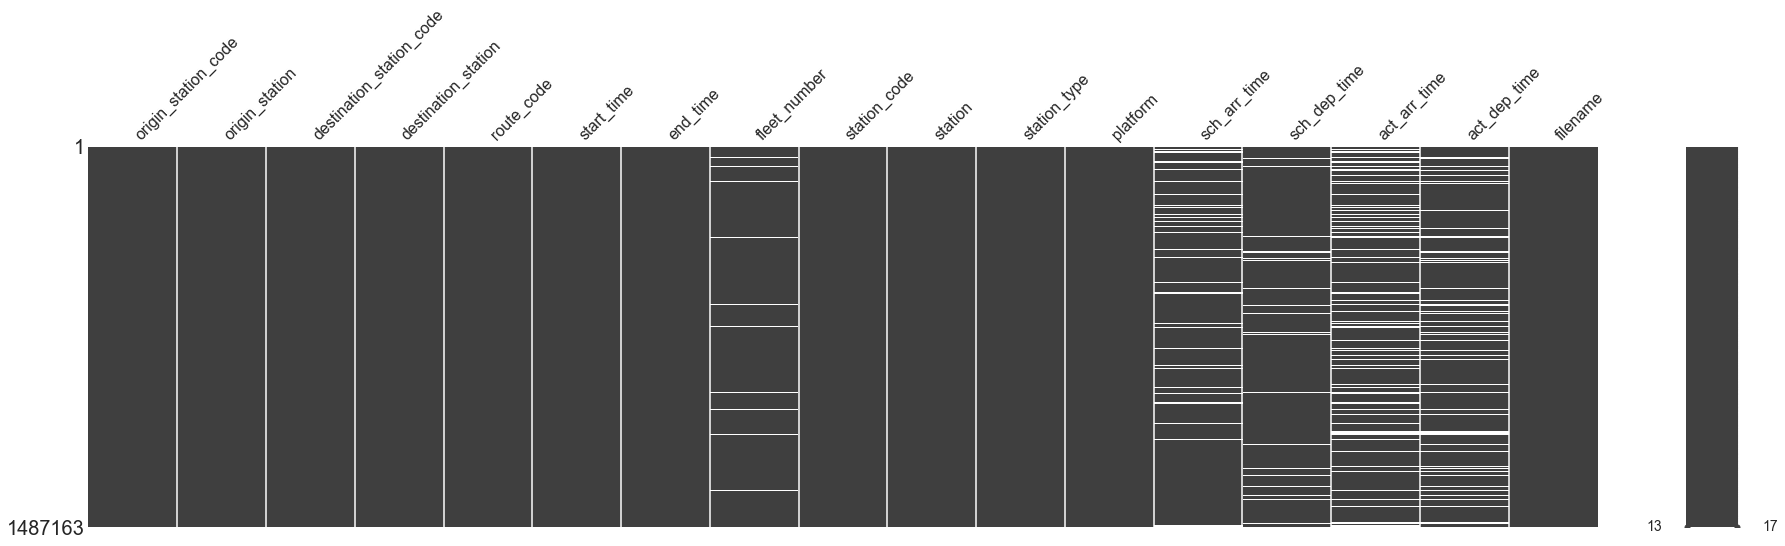

In [12]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_raw
msno.matrix(df_raw, figsize = (30, 7))

In [13]:
# Counts of missing values
null_value_stats = df_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

fleet_number     72365
sch_arr_time     88480
sch_dep_time     88480
act_arr_time    261541
act_dep_time    253830
dtype: int64

The visualisation shows us very quickly that there is a large number of mssing values in the `fleet_number`, `sch_arr_time`, `sch_dep_time`, `act_arr_time`, and `act_dep_time` attributes, 72,365, 88,480, 88,480, 261,541, and 253,830 respectively (determined by the [.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) counts).

Depending on the analysis, these five attributes will need to be cleaned and preprocessed as part of the Data Engineering process. However, for our needs, we are only concerned with the `origin_station`, `destination_station`, `start_time`, and `filename` (date) features, and therefore our data is good enough for our needs in it's current state.

<a id='section3.5'></a>

### 3.5. Export the Raw DataFrame
Let's export the raw DataFrame, `df_raw`, as a CSV file using the [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method, so that this data can be accessed by others outside a Jupyter notebook who may not be able to merge the data e.g. if you wanted to plot this data in Excel. This file will be saved in the subfolder 'combined' as `df_merged`.

In [14]:
df_raw.to_csv(dataDir + "/combined/df_raw.csv")

Now we have created a pandas DataFrame, we'll next need to clean and wrangled the data to meet our needs for the Exploratory Data Analysis (EDA).

<a id='section4'></a>

## 4. Data Engineering

<a id='section4.1'></a>

### 4.1. Introduction
Before we answer the questions in the brief through Exploratory Data Analysis (EDA), we'll first need to clean and wrangled the data to be in a form that meet our needs.

<a id='section4.2'></a>

### 4.2. Rename Columns
Next, let's rename the `filename` attribute to something more appropriate to our needs by using the [.rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html). We'll rename this column simply to `date`.

In [67]:
# Rename 'filename' attribute to 'date'
df_raw.rename(columns={'filename': 'date'}, inplace=True)

<a id='section4.3'></a>

### 4.3. String Cleaning
Next, let's clean the `filename` attribute by removing the `.csv` substring that's remaining from preserving the filename by using the [.replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html). This will become more important in [next section](#section4.2) where we'll be converting the `object` type fields to `datetime`.

In [66]:
# Remove the '.csv' substring from the filename attribute
df_raw.replace(regex=['.csv'], value='', inplace=True)

<a id='section4.4'></a>

### 4.4. Convert Data Types
We'll next convert the attributes that contain datetime data from `object` to `datetime64[ns]` data type using the  using the [.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.
*    `start_time`
*    `end_time`
*    `sch_arr_time`
*    `sch_dep_time`
*    `act_arr_time`
*    `act_dep_time`

These features are not used as part of our analysis but a demonstration of how to do the conversion is shown below for reference:

In [16]:
df_raw['start_time'] = pd.to_datetime(df_raw['start_time'])
df_raw['end_time'] = pd.to_datetime(df_raw['end_time'])
df_raw['sch_arr_time'] = pd.to_datetime(df_raw['sch_arr_time'])
df_raw['sch_dep_time'] = pd.to_datetime(df_raw['sch_dep_time'])
df_raw['act_arr_time'] = pd.to_datetime(df_raw['act_arr_time'])
df_raw['act_dep_time'] = pd.to_datetime(df_raw['act_dep_time'])

Also need to convert the following `date` field to...

In [17]:
# df_raw['date'] = pd.to_date(df_raw['date'])

In [18]:
df_raw.head()

,origin_station_code,origin_station,destination_station_code,destination_station,route_code,start_time,end_time,fleet_number,station_code,station,station_type,platform,sch_arr_time,sch_dep_time,act_arr_time,act_dep_time,date
0,MAM,Machine Mist,ROT,Roll Test,4,2015-09-26 05:01:00,2015-09-26 05:41:00,3088.0,MAM,Machine Mist,Passenger,Outbound,NaT,2015-09-26 05:01:00,NaT,2015-09-26 05:01:10,2015-09-26
1,MAM,Machine Mist,ROT,Roll Test,4,2015-09-26 05:01:00,2015-09-26 05:41:00,3088.0,BUB,Bucket Believe,Passenger,Outbound,2015-09-26 05:01:30,2015-09-26 05:02:00,2015-09-26 05:02:13,2015-09-26 05:02:38,2015-09-26
2,MAM,Machine Mist,ROT,Roll Test,4,2015-09-26 05:01:00,2015-09-26 05:41:00,3088.0,MOM,Monkey Machine,Passenger,Outbound,2015-09-26 05:04:30,2015-09-26 05:05:00,2015-09-26 05:04:41,2015-09-26 05:05:09,2015-09-26
3,MAM,Machine Mist,ROT,Roll Test,4,2015-09-26 05:01:00,2015-09-26 05:41:00,3088.0,FAF,Father Form,Passenger,Outbound,2015-09-26 05:07:30,2015-09-26 05:08:00,2015-09-26 05:06:46,2015-09-26 05:07:28,2015-09-26
4,MAM,Machine Mist,ROT,Roll Test,4,2015-09-26 05:01:00,2015-09-26 05:41:00,3088.0,GIS,Giraffe Spot,Passenger,Outbound,2015-09-26 05:09:30,2015-09-26 05:10:00,2015-09-26 05:08:43,2015-09-26 05:09:40,2015-09-26


In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487163 entries, 0 to 1487162
Data columns (total 17 columns):
origin_station_code         1487163 non-null object
origin_station              1487163 non-null object
destination_station_code    1487163 non-null object
destination_station         1487163 non-null object
route_code                  1487163 non-null int64
start_time                  1487163 non-null datetime64[ns]
end_time                    1487163 non-null datetime64[ns]
fleet_number                1414798 non-null float64
station_code                1487163 non-null object
station                     1487163 non-null object
station_type                1487163 non-null object
platform                    1487163 non-null object
sch_arr_time                1398683 non-null datetime64[ns]
sch_dep_time                1398683 non-null datetime64[ns]
act_arr_time                1225622 non-null datetime64[ns]
act_dep_time                1233333 non-null datetime64[ns]
date   

We can now see that the six attributes in question have a datetime64[ns] data type.

Finally, let's assigned the cleaned and engineered DataFrame, `df_raw`, to a new DataFrame, `df_merged`, that' we can take forward into the next section of Exploratory Data Analysis (EDA).

In [20]:
df_merged = df_raw

<a id='section4.4'></a>

### 4.5. Export the Engineered DataFrame
Let's export the merged DataFrame, df_raw as a CSV file using the [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method. This file will be saved in the subfolder 'combined' as `df_merged`.

In [21]:
df_merged.to_csv(dataDir + "/combined/df_merged.csv")

Now we have created a pandas DataFrame and wrangled the data to meet our needs, we'll next conduct and Exploratory Data Analysis (EDA) to answer the three questions posed in the brief.

<a id='section4'></a>

## 5. Exploratory Data Analysis (EDA)

The Exploratory Data Analysis aims to answer the following three questions as set in the task brief:
1.    Identify a table showing how many of each journey are run per day ([Section 5.1](#section5.1))
2.    Subset the table such that it contains the 16 most common journeys per date ([Section 5.2](#section5.2))
3.    Identify the day that the timetable was changed *via* a suitably convincing visualisation ([Section 5.3](#section5.3))

<a id='section5.1'></a>

### 5.1. Identify a table showing how many of each journey are run per day 
We need to create a pandas DataFrame that showing how many of each journey are run per day. The DataFrame should have the following column headings: `date`, `origin_station`, `destination_station`, and `count`.

In [22]:
# Concatanate origin to destination as journey name
df_merged['complete_route_name'] = df_merged['origin_station'] + " to " + df_merged['destination_station']

In [23]:
# View all unique routes
df_merged['complete_route_name'].unique().tolist()

['Machine Mist to Roll Test',
 'Roll Test to Attempt Pin',
 'Attempt Pin to Roll Test',
 'Attempt Pin to Sugar Wave',
 'Step Scarecrow Turnback to Jail Vest',
 'Jail Vest to Children Cast Turnback',
 'Children Cast Turnback to Jail Vest',
 'Jail Vest to Step Scarecrow Turnback',
 'Roll Test to Skate Stone Turnback',
 'Skate Stone Turnback to Sugar Wave',
 'Children Cast Turnback to Step Scarecrow Turnback',
 'Roll Test to Machine Mist',
 'Step Scarecrow Turnback to Bridge Bottle',
 'Bridge Bottle to Crib Team',
 'Crib Team to Bridge Bottle',
 'Bridge Bottle to Step Scarecrow Turnback',
 'Step Scarecrow Turnback to Skate Stone Turnback',
 'Skate Stone Turnback to Spiders Toothbrush',
 'Squirrel Fan Turnback to Suit Treatment Turnback',
 'Suit Treatment Turnback to Spiders Toothbrush',
 'Suit Treatment Turnback to Step Scarecrow Turnback',
 'Sugar Wave to Attempt Pin',
 'Step Scarecrow Turnback to Children Cast Turnback',
 'Children Cast Turnback to Dad Pickle',
 'Dad Pickle to Level Let

In [24]:
# Count the number of unique routes
print(len(df_merged['complete_route_name'].unique()))

81


We can see that there are a total of 81 unique routes.

Now we have created a pandas DataFrame of the full dataset, `df_raw`, we next need to wrangle the data as per the [Project brief](#section2) (Section 2), to a form that's more suited to our needs. We need to take the existing DataFrame of train data, `df_raw`, and use the [.groupby()](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to create a new DataFrame, `df_grouped`, that shows how many of trains of each journey are run per day. This new table needs to have the column headings `date`, `origin_station`, `destination_station` and `count`.

The code for this is as follows:

In [25]:
# Created groupedby DataFrame, by date and journey_full
df_grouped = df_merged.groupby(
   ['date', 'complete_route_name']
).agg(
    {
         'start_time': 'nunique'    # count the unique start_times to identify each journey
    }
).reset_index()    # reset index to get grouped columns back

# Rename columns
df_grouped.columns = ['Date', 'Route Name', 'Count']

# View new DataFrame, df_grouped
df_grouped

,Date,Route Name,Count
0,2015-08-01,Attempt Pin to Roll Test,92
1,2015-08-01,Attempt Pin to Skin Shape,1
2,2015-08-01,Attempt Pin to Sugar Wave,6
3,2015-08-01,Bridge Bottle to Ants Attempt,5
4,2015-08-01,Bridge Bottle to Skate Stone Turnback,143
...,...,...,...
2834,2015-09-30,Sugar Wave to Skate Stone Turnback,2
2835,2015-09-30,Sugar Wave to Suit Treatment Turnback,1
2836,2015-09-30,Suit Treatment Turnback to Spiders Toothbrush,89
2837,2015-09-30,Suit Treatment Turnback to Step Scarecrow Turn...,2


Let's export the grouped DataFrame as a CSV file as `df_grouped.csv`.

In [26]:
df_grouped.to_csv(dataDir + "/combined/df_grouped.csv")

<a id='section5.2'></a>

### 5.2. Subset the table such that it contains the 16 most common journeys per date
Next, we want to take the existing grouped DataFrame, `df_grouped` and amend it so that only shows the top 16 unique routes by count, per day.

The code for this is as follows:

In [27]:
df_sorted_by_group = df_grouped.groupby(['Date']).apply(
      lambda x: x.sort_values(['Count'],ascending = False)
      ).reset_index(drop = True)

In [28]:
df_sorted_by_group

,Date,Route Name,Count
0,2015-08-01,Skate Stone Turnback to Bridge Bottle,144
1,2015-08-01,Bridge Bottle to Skate Stone Turnback,143
2,2015-08-01,Clouds Goose to Crib Team,96
3,2015-08-01,Clouds Goose to Spiders Toothbrush,96
4,2015-08-01,Dad Pickle to Level Lettuce,95
...,...,...,...
2834,2015-09-30,Skin Shape to Attempt Pin,1
2835,2015-09-30,Skate Stone Turnback to Spiders Toothbrush,1
2836,2015-09-30,Attempt Pin to Skin Shape,1
2837,2015-09-30,Machine Mist to Skin Shape,1


In [29]:
df_grouped_top16 = df_sorted_by_group.groupby(['Date']).head(16)

Let's look at the head and tail of our DataFrame to check that only the 16 most common journeys per date are shown.

In [30]:
df_grouped_top16.head(50)

,Date,Route Name,Count
0,2015-08-01,Skate Stone Turnback to Bridge Bottle,144
1,2015-08-01,Bridge Bottle to Skate Stone Turnback,143
2,2015-08-01,Clouds Goose to Crib Team,96
3,2015-08-01,Clouds Goose to Spiders Toothbrush,96
4,2015-08-01,Dad Pickle to Level Lettuce,95
5,2015-08-01,Squirrel Fan Turnback to Coast Chess Turnback,95
6,2015-08-01,Clouds Goose to Level Lettuce,95
7,2015-08-01,Level Lettuce to Dad Pickle,95
8,2015-08-01,Crib Team to Coast Chess Turnback,95
9,2015-08-01,Level Lettuce to Clouds Goose,95


In [31]:
df_grouped_top16.tail(50)

,Date,Route Name,Count
2660,2015-09-27,Step Scarecrow Turnback to Attempt Pin,10
2661,2015-09-27,Skate Stone Turnback to Step Scarecrow Turnback,9
2683,2015-09-28,Dad Pickle to Level Lettuce,90
2684,2015-09-28,Level Lettuce to Skate Stone Turnback,90
2685,2015-09-28,Suit Treatment Turnback to Spiders Toothbrush,89
2686,2015-09-28,Children Cast Turnback to Jail Vest,89
2687,2015-09-28,Skate Stone Turnback to Level Lettuce,89
2688,2015-09-28,Level Lettuce to Dad Pickle,89
2689,2015-09-28,Jail Vest to Children Cast Turnback,89
2690,2015-09-28,Squirrel Fan Turnback to Suit Treatment Turnback,88


We can now see that our table contains the 16 most common journeys per date, in descending order, answering our second question.

Let's export the top 16 grouped DataFrame as a CSV file as `df_grouped_top16.csv`.

In [32]:
df_grouped_top16.to_csv(dataDir + "/combined/df_grouped_top16.csv")

<a id='section5.3'></a>

### 5.3. Identify the day that the timetable was changed *via* a suitably convincing visualisation 
We'll be using [Seaborn](https://seaborn.pydata.org/) for some basic plotting, however, before we plot our data, we need to reengineer our pandas DataFrame of grouped data to create a line plot that has `Date` on the x-axis and journey on the right axis. The values of the plot should be the summation of the count of each route per day to show how many of each journey are run per day.

To do these, we need to use the [.pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) method to reshape the DataFrame.

The code for this is as follows:

In [53]:
df_pivot = df_grouped.pivot(index='Date', columns='Route Name')

Let's take a look at the DataFrame,  `df_pivot`, to see if it has the `Date` attribute as the index and `Route Name` as the columns.

In [34]:
df_pivot

Count                           \
Route Name Attempt Pin to Level Lettuce Attempt Pin to Roll Test   
Date                                                               
2015-08-01                          NaN                     92.0   
2015-08-02                          NaN                     68.0   
2015-08-03                          NaN                     87.0   
2015-08-04                          NaN                     86.0   
2015-08-05                          NaN                     87.0   
...                                 ...                      ...   
2015-09-26                          NaN                     91.0   
2015-09-27                         69.0                      NaN   
2015-09-28                          NaN                     86.0   
2015-09-29                          NaN                     86.0   
2015-09-30                          NaN                     86.0   

                                                                             \
Route Name Attempt Pin to Skin Shape Attempt Pin to Step Scarecrow Turnback   
Date                                                                          
2015-08-01                       1.0                                    NaN   
2015-08-02                       1.0                                    NaN   
2015-08-03                       1.0                                    NaN   
2015-08-04                       1.0                                    NaN   
2015-08-05                       1.0                                    NaN   
...                              ...                                    ...   
2015-09-26                       1.0                                    NaN   
2015-09-27                       NaN                                    7.0   
2015-09-28                       1.0                                    NaN   
2015-09-29                       1.0                                    NaN   
2015-09-30                       1.0                                    NaN   

                                                               \
Route Name Attempt Pin to Sugar Wave Boys Bells to Dad Pickle   
Date                                                            
2015-08-01                       6.0                      NaN   
2015-08-02                       6.0                      NaN   
2015-08-03                       6.0                      NaN   
2015-08-04                       6.0                      1.0   
2015-08-05                       6.0                      NaN   
...                              ...                      ...   
2015-09-26                       6.0                      NaN   
2015-09-27                       NaN                      NaN   
2015-09-28                       6.0                      NaN   
2015-09-29                       6.0                      NaN   
2015-09-30                       6.0                      NaN   

                                                                     \
Route Name Bridge Bottle to Ants Attempt Bridge Bottle to Crib Team   
Date                                                                  
2015-08-01                           5.0                        NaN   
2015-08-02                           3.0                        NaN   
2015-08-03                           9.0                        NaN   
2015-08-04                           9.0                        NaN   
2015-08-05                           9.0                        NaN   
...                                  ...                        ...   
2015-09-26                           2.0                       93.0   
2015-09-27                           NaN                        NaN   
2015-09-28                          10.0                       88.0   
2015-09-29                          10.0                       88.0   
2015-09-30                          10.0                       88.0   

                                                  \
Route Name Bridg

We can now see from the axes of the resulting DataFrame, `df_pivot`, has the `Date` attribute as the index and `Route Name` as the columns.

Let's export the Pivot DataFrame as a CSV file as `df_pivot.csv`.

In [36]:
df_pivot.to_csv(dataDir + "/combined/df_pivot.csv")

Now that our DataFrame has been engineered as required, we can now take this DataFrame and plot a line chart of the data using [Seaborn](https://seaborn.pydata.org/).

Text(0.5, 0, 'Date')

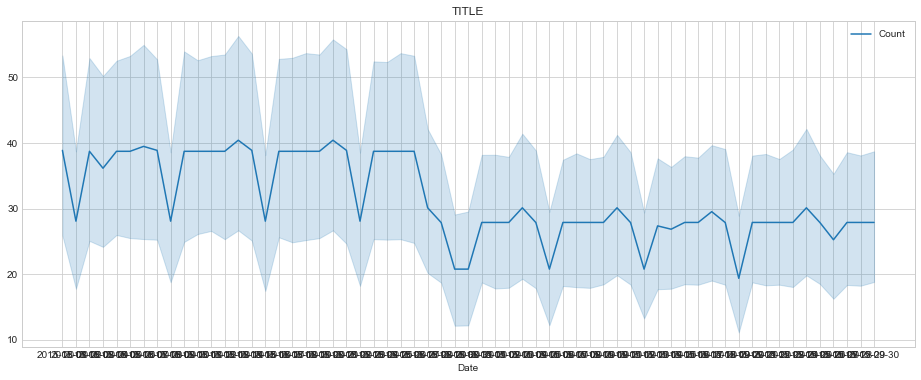

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
# plt.figure(figsize=(24,20))

# Add title
plt.title("TITLE")

# Line chart showing ... 
sns.lineplot(data=df_pivot)

# Add label for horizontal axis
plt.xlabel("Date")

The plot is crowded but we can see that pattern of the journeys changed on 28th August.

<a id='section6'></a>

## 6. Summary

This notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [Seaborn](https://seaborn.pydata.org/) to plot the data.

In this workbook, we have taken a dataset of train data and through Exploratory Data Analysis, determined the following:
*    Identified how many of each journey are run per day,
*    Subsetted this table such that it contains the 16 most common journeys per date, and
*    Identified 28th August 2015 as the day that the timetable was changed *via* a visualisation.

To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for data visualisation,
*    The [glob](https://docs.python.org/3/library/glob.html) module for reading multiple CSVs to create one single DataFrame, and
*    The [os](https://docs.python.org/3/library/os.html) module which provides a portable way of using operating system dependent functionality.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    [os.path.basename(path)](https://docs.python.org/3/library/os.path.html) function to read the filenames of the csv files,
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset,
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files,
*    The pandas [.rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html). method to rename columns,
*    The pandas [.replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method to clean substrings,
*    The pandas [.groupby()](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to group the data,
*    [Lambda Expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions), and
*    The pandas [pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) method to reshape the DataFrame from a long DataFrame to a wide DataFrame.

<a id='section7'></a>

## 7. Bibliography

*    Answer to my [StackOverflow question](https://stackoverflow.com/questions/59805463/pandas-groupby-how-to-groupby-and-aggregate-data-to-show-only-the-top-3-values) as to subsetting the grouped DataFrame to show only the 16 most common journeys per date.

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)